## Data pull, parsing and preliminary modeling
#### CS109a - Sam, Luke, Jake, Jeremy
#### Chicago Food Inspection Forecasting
#### Last Updated: 11/28/16

In [ ]:
from download import main

First we load in the data:

In [2]:
import datetime
import optparse
import requests
import numpy as np
import pandas as pd
from math import radians, cos, sin, asin, sqrt
from sys import exit
import math
import matplotlib.pyplot as plt
import seaborn

%matplotlib inline

data = pd.read_csv('DOWNLOADED_DATA.csv')



In [3]:

result_possibilities = ['Pass', 'Fail', 'Pass w/ Conditions']
valid_result_bools = [result in result_possibilities for result in data.results]
data = data[valid_result_bools]

In [4]:
def fail(result):
    if 'Fail' in result:
        return 1
    else:
        return 0
    
    
def grocery_store(facility_type):
    if 'Grocery Store' == facility_type:
        return 0
    else:
        return 1

In [5]:
data['result_binary'] = [fail(result) for result in data.results]
data['grocery'] = [grocery_store(facility_type) for facility_type in data.facility_type]

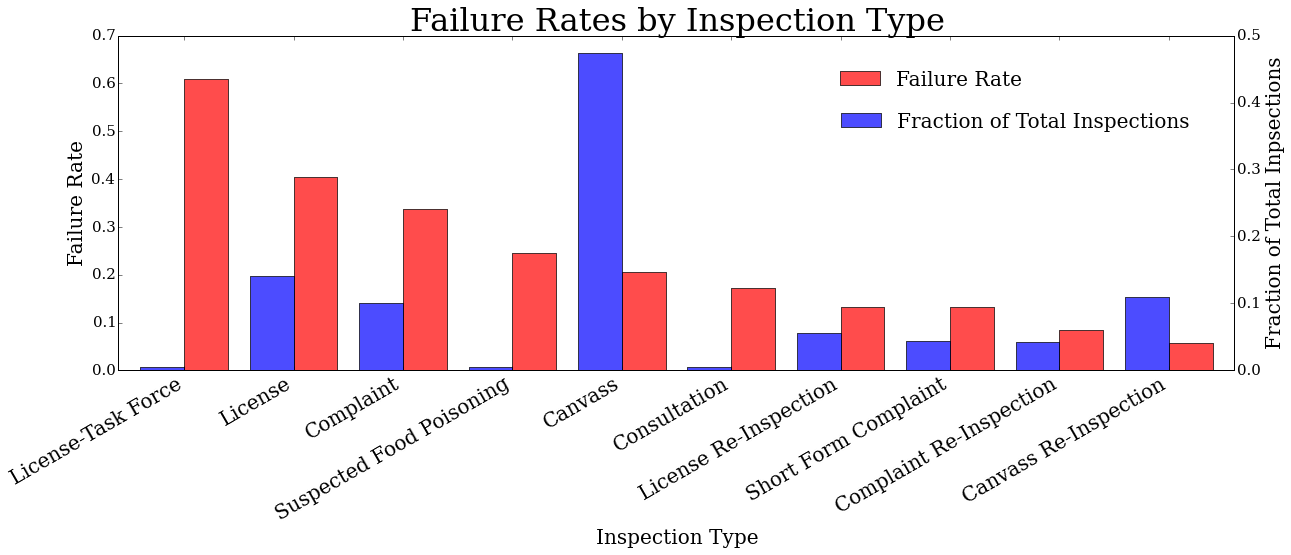

In [13]:
top_inspection_types = data.groupby('inspection_type').count().result_binary.sort_values(ascending=False).index[:10]
top_inspection_types_sorted = data.groupby('inspection_type').mean().result_binary[top_inspection_types].sort_values(ascending=False).index

fig = plt.figure(figsize=(20,6)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
width = 0.4

plt.rc('font', family='serif')
plt.rc('font', family='serif')


data.groupby('inspection_type').mean().result_binary[top_inspection_types].sort_values(ascending=False).plot(kind='bar',color='r',ax = ax, alpha=0.7,width=width,position=0)
percentage_1 = data.groupby('inspection_type').count().result_binary[top_inspection_types_sorted]/len(data)
percentage_1.plot(kind='bar',color='b',ax = ax2, alpha=0.7,width=width,position=1)
ax.set_ylabel('Failure Rate',fontsize = 20)
ax2.set_ylabel('Fraction of Total Inpsections',fontsize = 20)
ax.set_xlabel('Inspection Type',fontsize = 20)
plt.title('Failure Rates by Inspection Type',fontsize = 32)
ax.set_xticklabels(labels = top_inspection_types_sorted, ha = 'right')
leg = ax.legend(['Failure Rate'],loc=1, bbox_to_anchor=(0.825, 0.95),fontsize = 20)
leg2 = ax2.legend(['Fraction of Total Inspections'],loc=1, bbox_to_anchor=(0.975, 0.825),fontsize = 20)
ax.set_xlim(-0.6,9.6)

leg.get_frame().set_linewidth(0.0)
leg2.get_frame().set_linewidth(0.0)


for tick in ax.xaxis.get_major_ticks():
                tick.label.set_fontsize(20) 
                # specify integer or one of preset strings, e.g.
                #tick.label.set_fontsize('x-small')
                tick.label.set_rotation(30)

              
                
for tick in ax.yaxis.get_major_ticks():
                tick.label.set_fontsize(15) 
                # specify integer or one of preset strings, e.g.
                #tick.label.set_fontsize('x-small') 

for label2 in ax2.yaxis.get_majorticklabels():
                label2.set_fontsize(15) 
                # specify integer or one of preset strings, e.g.
                #tick.label.set_fontsize('x-small')  


In [8]:
inspection_type_dummies = pd.get_dummies(data['inspection_type'])
inspection_type_dummies = inspection_type_dummies[top_inspection_types]


data = pd.concat([data,inspection_type_dummies],axis=1,join='inner')


biz_cols = []
for col in data.columns:
    if 'business_activity' in col:
        biz_cols.append(col)
        
count = []
mean = []
for col in biz_cols:
    mean.append(data[data[col] == 1].result_binary.mean())
    count.append(len(data[data[col] == 1].result_binary))

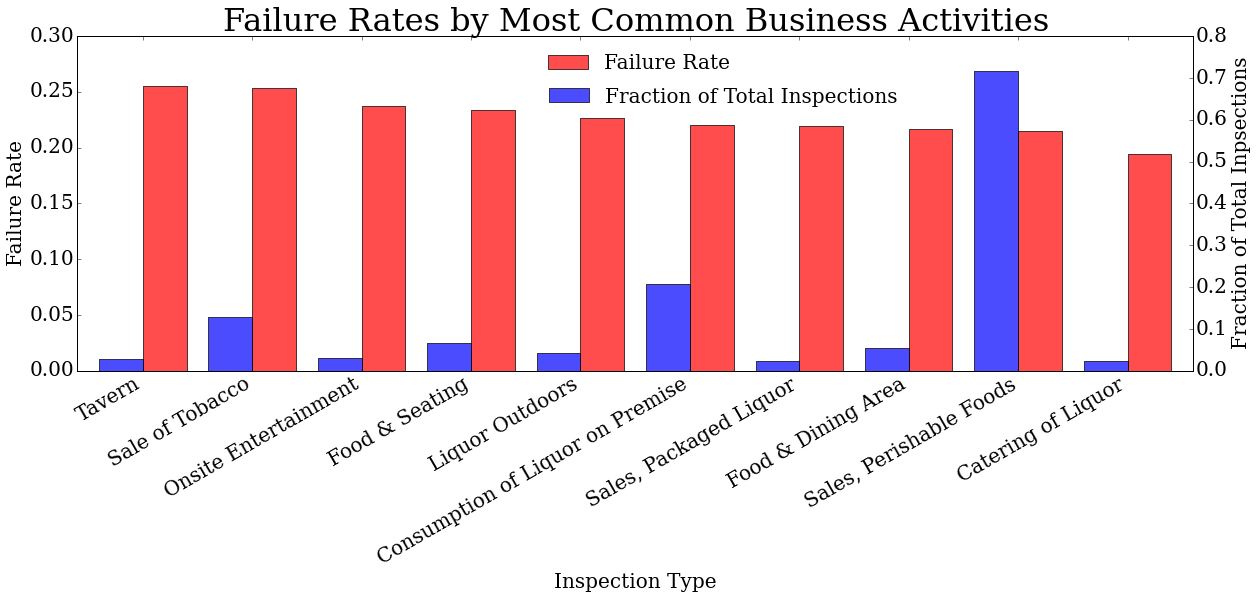

In [12]:
biz_cols_mean = pd.Series(mean,biz_cols)
biz_cols_count = pd.Series(count,biz_cols)

biz_cols_count_top = biz_cols_count.sort_values(ascending=False).index[:10]


biz_col_mean_sorted = biz_cols_mean[biz_cols_count_top].sort_values(ascending=False).index

fig = plt.figure(figsize = (20,6)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4

biz_cols_mean[biz_col_mean_sorted].sort_values(ascending=False).plot(kind='bar',color='r',ax = ax, alpha=0.7,width=width,position=0)
percentage = biz_cols_count[biz_col_mean_sorted]/len(data)
percentage.plot(kind='bar',color='b',ax = ax2, alpha=0.7,width=width,position=1)



ax.set_ylabel('Failure Rate',fontsize = 20)
ax2.set_ylabel('Fraction of Total Inpsections',fontsize = 20)
ax.set_xlabel('Inspection Type',fontsize = 20)
plt.title('Failure Rates by Most Common Business Activities',fontsize = 32)
leg = ax.legend(['Failure Rate'],loc=1, bbox_to_anchor=(0.6, 1),fontsize = 20)
leg2 = ax2.legend(['Fraction of Total Inspections'],loc=1, bbox_to_anchor=(0.75, 0.9),fontsize = 20)
ax.set_xlim(-0.6,9.6)

leg.get_frame().set_linewidth(0.0)
leg2.get_frame().set_linewidth(0.0)



ax.xaxis.set_ticklabels(['Tavern',
 'Sale of Tobacco', 
 'Onsite Entertainment', 
 'Food & Seating',
 'Liquor Outdoors',
 'Consumption of Liquor on Premise',
 'Sales, Packaged Liquor',
 'Food & Dining Area',
 'Sales, Perishable Foods',
 'Catering of Liquor'],fontsize = 20, ha = 'right')


for tick in ax.xaxis.get_major_ticks():
                tick.label.set_fontsize(20) 
                # specify integer or one of preset strings, e.g.
                #tick.label.set_fontsize('x-small')
                tick.label.set_rotation(30)

              
                
for tick in ax.yaxis.get_major_ticks():
                tick.label.set_fontsize(20) 
                # specify integer or one of preset strings, e.g.
                #tick.label.set_fontsize('x-small') 

for label2 in ax2.yaxis.get_majorticklabels():
                label2.set_fontsize(20) 
                # specify integer or one of preset strings, e.g.
                #tick.label.set_fontsize('x-small')  
plt.show()

In [105]:
results_data = pd.read_csv('pred_prob_for_fails_cv.csv')
results_data['inspection_date'] = pd.to_datetime(results_data['inspection_date'],format = "%y-%m-%d")
results_data['ids'] = results_data['Unnamed: 0']



In [106]:
results_data.head()



,Unnamed: 0,"AdaBoost, log loss: 0.73, params = ['n_estimators: 100']","KNN, log loss: 17.24, params = ['n_neighbors: 50']","LDA, log loss: 0.72, params = ['shrinkage: 0.0', 'solver: lsqr']","LogReg, log loss: 0.75, params = ['C: 10.0']","QDA, log loss: 1.07, params = ['reg_param: 0.25']","RandomForest, log loss: 0.96, params = ['n_estimators: 50', 'max_features: 45', 'max_depth: 2']",inspection_date,result_binary,ids
0,5,0.500691,0.42,0.517646,0.522678,0.472780,0.475355,2016-01-26,0,5
1,24,0.493252,0.40,0.101334,0.090216,0.163932,0.259399,2016-06-23,0,24
2,29,0.498136,0.42,0.383257,0.378739,0.372917,0.475355,2016-03-01,0,29
3,36,0.498669,0.48,0.478759,0.466773,0.516154,0.475355,2016-09-16,0,36
4,37,0.499631,0.36,0.488194,0.498767,0.779546,0.475355,2016-06-29,0,37


In [107]:

from dateutil.relativedelta import relativedelta  
import seaborn
seaborn.set_style(style='white')



def list_rank(true_values,probabilities,data_test):
    result_series = pd.Series(probabilities,true_values).sort_values(ascending=False)
    result_time_series = pd.Series(result_series.index,data_test.inspection_date)
    return result_series,result_time_series
    

def series_running(result_time_series):
    results = np.array(result_time_series.result_binary)
    running_mean = []
    for index in range(len(results)-1):
        running_mean.append(np.mean(results[0:index+1]))
    return pd.Series(running_mean,result_time_series.index[1:])



def fail_days(result_timeseries):
    date_array = np.array(result_timeseries.index)
    result_array = np.array(result_timeseries.result_binary)
    start_date = pd.to_datetime(date_array[0]) - relativedelta(days=1)
    fail_days = 0
    for date_ind in range(len(result_timeseries.index)):
        date = date_array[date_ind]
        delta = pd.to_datetime(date) - start_date
        fail_days += delta.days*result_array[date_ind]
    return fail_days




In [108]:
test_columns = results_data.columns[-3:]
model_columns = results_data.columns[1:-3]
true_values = results_data[results_data.columns[-1]]
test_data = results_data[test_columns].sort_values('inspection_date')
test_data = test_data.set_index([test_data.inspection_date])


In [109]:
fail_day_count_mean = []
for model_column in model_columns:
    result_series = results_data[[model_column,'result_binary','ids']]
    sorted_series = result_series.sort_values(result_series.columns[0],ascending=False)
    sorted_series = sorted_series.set_index([test_data.inspection_date])
    fail_day_count_mean.append(fail_days(sorted_series)/test_data.result_binary.sum())
    
    
    

In [110]:
true_fail_days = fail_days(test_data)/test_data.result_binary.sum()




In [258]:
sorted_failday_results

Actual                                                                                             152
KNN, log loss: 17.24, params = ['n_neighbors: 50']                                                 149
RandomForest, log loss: 0.96, params = ['n_estimators: 50', 'max_features: 45', 'max_depth: 2']    120
QDA, log loss: 1.07, params = ['reg_param: 0.25']                                                  119
LDA, log loss: 0.72, params = ['shrinkage: 0.0', 'solver: lsqr']                                   112
LogReg, log loss: 0.75, params = ['C: 10.0']                                                       111
AdaBoost, log loss: 0.73, params = ['n_estimators: 100']                                           108
dtype: int64

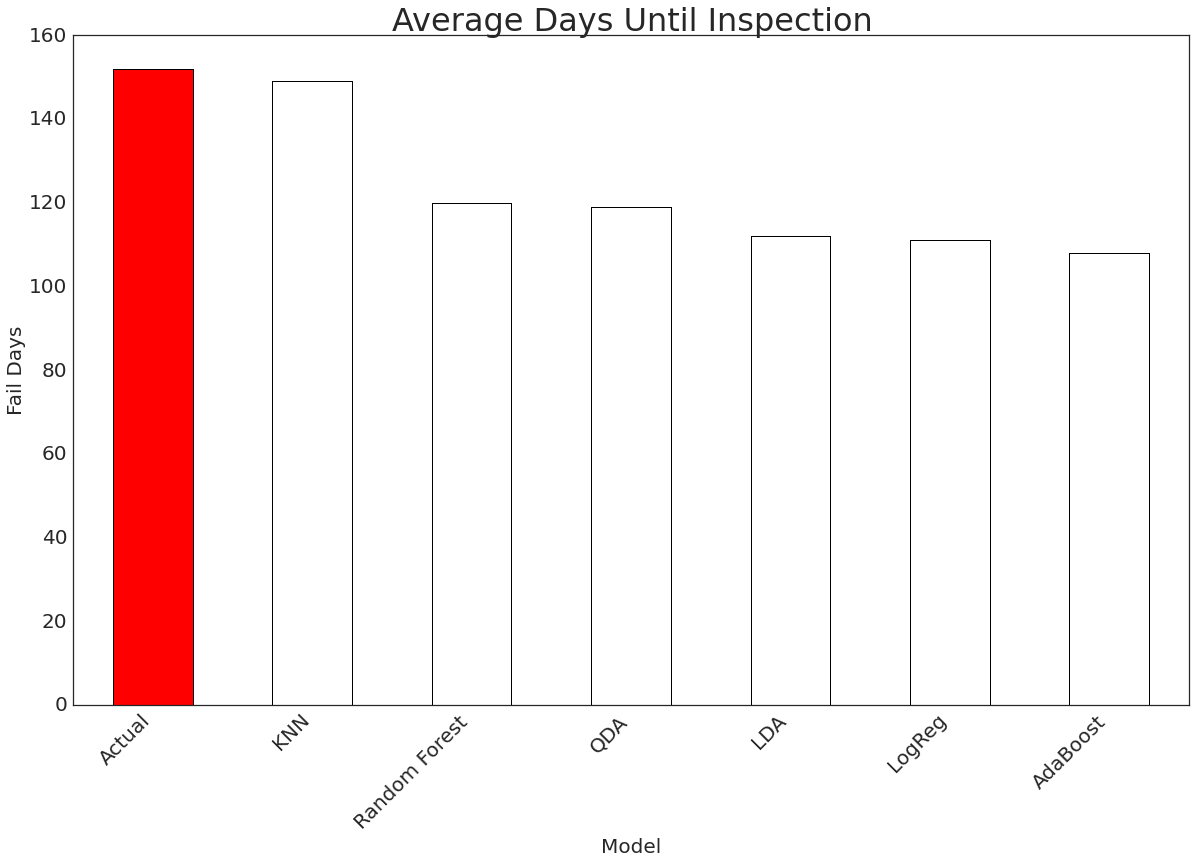

In [111]:
all_cols = list(model_columns)
all_cols.append('Actual')
color_series = pd.Series(['w']*len(model_columns) + ['r'],index = all_cols)
sorted_failday_results = pd.Series(fail_day_count_mean + [true_fail_days],index = all_cols).sort_values(ascending=False)

color_list =  list(color_series[sorted_failday_results.index])



fig = plt.figure(figsize=(20,12))
ax1 = fig.add_subplot(111) # Create matplotlib axes

sorted_failday_results.plot(kind = 'bar',color= color_list,ax = ax1, edgecolor='black',lw=1)


plt.title('Average Days Until Inspection',fontsize=32)
plt.rc('font', family='serif')
plt.xlabel('Model',fontsize=20)
plt.ylabel('Fail Days',fontsize=20)
ax1.set_xticklabels(labels = list(sorted_failday_results.index), ha = 'right')

ax1.xaxis.set_ticklabels(['Actual',
 'KNN', 
 'Random Forest', 
 'QDA',
 'LDA',
 'LogReg',
 'AdaBoost'],fontsize = 20, ha = 'right')




for tick in ax1.xaxis.get_major_ticks():
                tick.label.set_fontsize(20) 
                # specify integer or one of preset strings, e.g.
                #tick.label.set_fontsize('x-small')
                tick.label.set_rotation(45)
                
                
for tick in ax1.yaxis.get_major_ticks():
                tick.label.set_fontsize(20) 
                # specify integer or one of preset strings, e.g.
                #tick.label.set_fontsize('x-small') 
                
                

result_binary    69.04386
ids              69.04386
dtype: float64


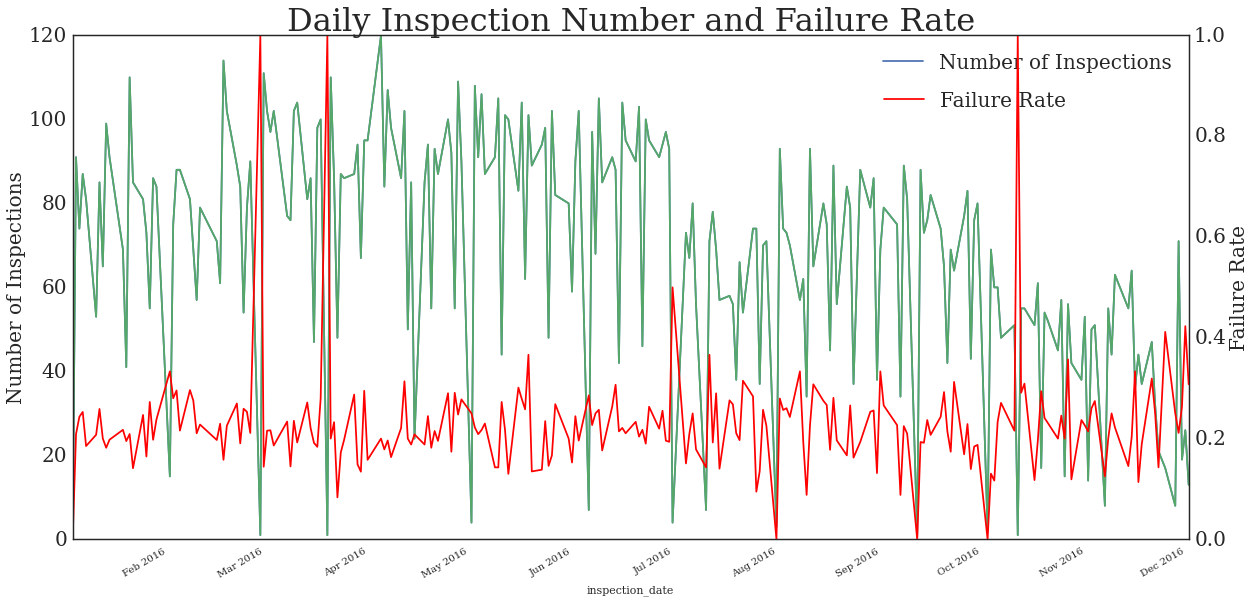

In [112]:
fig = plt.figure(figsize=(20,10))
ax3 = fig.add_subplot(111) # Create matplotlib axes
ax4 = ax3.twinx() # Create another axes that shares the same x-axis as ax.

test_data.groupby('inspection_date').count().plot(ax = ax3)
test_data.groupby('inspection_date').mean()['result_binary'].plot(ax = ax4,color='r')

print test_data.groupby('inspection_date').count().mean()


ax3.legend(['Number of Inspections'],loc=1, bbox_to_anchor=(1, 1),fontsize = 20)
ax4.legend(['Failure Rate'],loc=1, bbox_to_anchor=(0.905, 0.925),fontsize = 20)

plt.rc('font', family='serif')
plt.title('Daily Inspection Number and Failure Rate',fontsize=32)
plt.xlabel('Date',fontsize=20)
ax3.set_ylabel('Number of Inspections',fontsize = 20)
ax4.set_ylabel('Failure Rate',fontsize = 20)

for tick in ax3.xaxis.get_major_ticks():
                tick.label.set_fontsize(10) 
                # specify integer or one of preset strings, e.g.
                #tick.label.set_fontsize('x-small') 
                
                
for tick in ax4.yaxis.get_major_ticks():
                tick.label.set_fontsize(20) 
                # specify integer or one of preset strings, e.g.
                #tick.label.set_fontsize('x-small') 

            
for label3 in ax3.yaxis.get_majorticklabels():
                label3.set_fontsize(20) 
                # specify integer or one of preset strings, e.g.
                #tick.label.set_fontsize('x-small') 
                
for label4 in ax4.yaxis.get_majorticklabels():
                label4.set_fontsize(20) 
                # specify integer or one of preset strings, e.g.
                #tick.label.set_fontsize('x-small')  
                

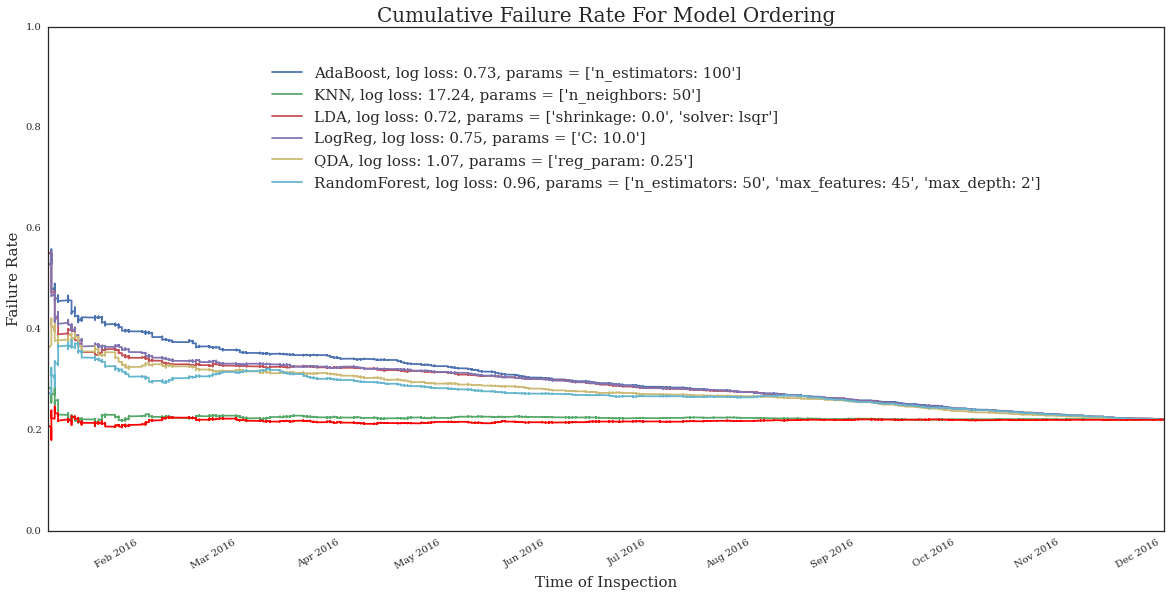

In [113]:

fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(111) # Create matplotlib axes

for model_column in model_columns:
    result_series = results_data[[model_column,'result_binary']]
    sorted_series = result_series.sort_values(result_series.columns[0],ascending=False)
    sorted_series = sorted_series.set_index([test_data.inspection_date])
    series_running(sorted_series).plot(ax = ax1)
    
series_running(test_data).plot(legend = True, ax = ax1,color='r')
plt.legend(list(model_columns),loc=1, bbox_to_anchor=(0.9, 0.95),fontsize = 15)
plt.title('Cumulative Failure Rate For Model Ordering',fontsize=20)
plt.xlabel('Time of Inspection',fontsize=15)
plt.ylabel('Failure Rate',fontsize=15)


In [114]:
model_column = model_columns[0]
result_series = results_data[[model_column,'result_binary']]
sorted_series = result_series.sort_values(result_series.columns[0],ascending=False)
sorted_series = sorted_series.set_index([test_data.inspection_date])
result_data_rolling_mean = sorted_series.result_binary.rolling(window = 1000).mean()
result_data_rolling_mean.plot(ax = ax1, legend= True)

In [259]:
list(model_columns)

["AdaBoost, log loss: 0.73, params = ['n_estimators: 100']",
 "KNN, log loss: 17.24, params = ['n_neighbors: 50']",
 "LDA, log loss: 0.72, params = ['shrinkage: 0.0', 'solver: lsqr']",
 "LogReg, log loss: 0.75, params = ['C: 10.0']",
 "QDA, log loss: 1.07, params = ['reg_param: 0.25']",
 "RandomForest, log loss: 0.96, params = ['n_estimators: 50', 'max_features: 45', 'max_depth: 2']"]

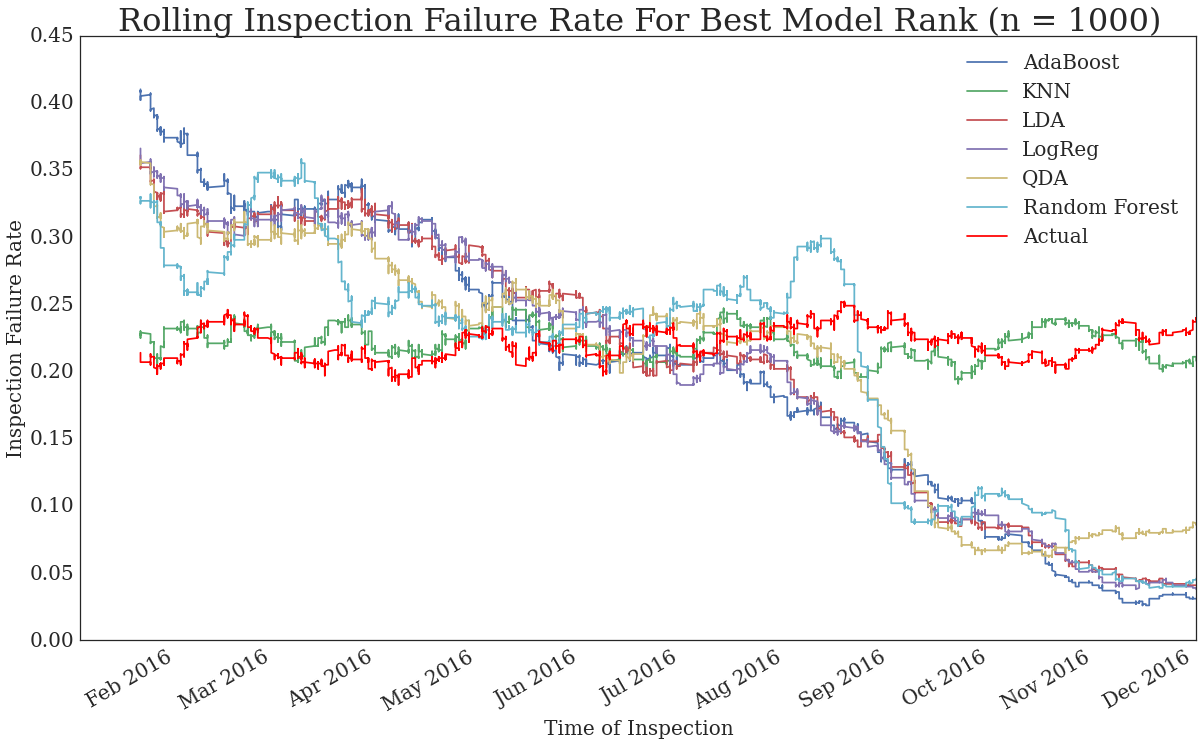

In [260]:

fig = plt.figure(figsize=(20,12))
ax1 = fig.add_subplot(111) # Create matplotlib axes

for model_column in model_columns:
    result_series = results_data[[model_column,'result_binary']]
    sorted_series = result_series.sort_values(result_series.columns[0],ascending=False)
    sorted_series = sorted_series.set_index([test_data.inspection_date])
    result_data_rolling_mean = sorted_series.result_binary.rolling(window = 1000).mean()
    result_data_rolling_mean.plot(ax = ax1, legend= True)
    
test_data.result_binary.rolling(window =1000).mean().plot(legend = True, color = 'r',ax = ax1)

plt.legend(['AdaBoost',
 'KNN', 
 'LDA',
 'LogReg',
 'QDA',
 'Random Forest',
 'Actual'],loc=1, fontsize = 20)
plt.rc('font', family='serif')
plt.title('Rolling Inspection Failure Rate For Best Model Rank (n = 1000)',fontsize=32)
plt.xlabel('Time of Inspection',fontsize=20)
plt.ylabel('Inspection Failure Rate',fontsize=20)
for tick in ax1.xaxis.get_major_ticks():
                tick.label.set_fontsize(20) 
                # specify integer or one of preset strings, e.g.
                #tick.label.set_fontsize('x-small') 
for tick in ax1.yaxis.get_major_ticks():
                tick.label.set_fontsize(20) 
                # specify integer or one of preset strings, e.g.
                #tick.label.set_fontsize('x-small') 




In [ ]:
rest_data_rolling_mean = pd.rolling_mean(test_data_series,1000).plot()



In [129]:
all_ada_result = results_data[[model_columns[0],'result_binary','ids','inspection_date']]
all_ada_result = all_ada_result.set_index([all_ada_result.ids])
all_ada_result = all_ada_result.sort_values('inspection_date')
all_ada_result.head()

,"AdaBoost, log loss: 0.73, params = ['n_estimators: 100']",result_binary,ids,inspection_date
ids,,,,
1893,0.497859,0,1893,2016-01-04
71285,0.499958,1,71285,2016-01-05
81062,0.501633,0,81062,2016-01-05
51941,0.495638,0,51941,2016-01-05
116038,0.500380,0,116038,2016-01-05


In [249]:

day_per_period = 30

#arbitrary
days_of_inspections_added = 30

#arbitarily decreased to make it so that more inspections come in than come out
inspections_per_day = 20
claim_rate_vector = []



In [250]:
def fail_days(result_timeseries,start_date):
    date_array = np.array(result_timeseries.index)
    result_array = np.array(result_timeseries.result_binary)
    fail_days = 0
    for date_ind in range(len(result_timeseries.index)):
        date = date_array[date_ind]
        delta = pd.to_datetime(date) - start_date
        fail_days += delta.days*result_array[date_ind]
    return fail_days

71 days 00:00:00


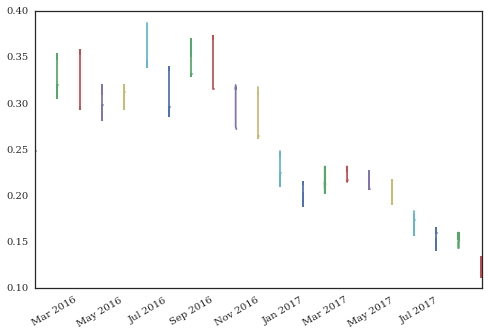

In [255]:


remaining_ada_result = all_ada_result
inspected_ids_all = []
start_date = all_ada_result.inspection_date.iloc[0]
fail_days_total = []
fail_count_total = []
for period in range(int(20) + 1):
    
    current_date = all_ada_result.inspection_date.iloc[0] + relativedelta(days = day_per_period)*(period)
    last_visible_date = all_ada_result.inspection_date.iloc[0] + relativedelta(days = day_per_period)*(period+1) + relativedelta(months = 0)
    
    visible_ada_result = remaining_ada_result[remaining_ada_result.inspection_date <= last_visible_date]
    sorted_series = visible_ada_result.sort_values(visible_ada_result.columns[0],ascending=False)

    day_delta = np.array([inspection_num/(inspections_per_day*day_per_period) for inspection_num in np.array(range(len(sorted_series)))+1])
    date_inspected = current_date + day_delta*relativedelta(days=1)
    
    sorted_series = sorted_series.set_index([date_inspected])
    
    
    
    
 
    inspected_ids = sorted_series.ids.iloc[0:inspections_per_day*day_per_period]
    inspected_series = sorted_series.iloc[0:inspections_per_day*day_per_period]
    fail_days_total.append(fail_days(inspected_series,start_date))
    fail_count_total.append(inspected_series.result_binary.sum())

    
    remaining_ada_result = remaining_ada_result.drop(np.array(inspected_ids))
    
    #plot running mean of inspected restaurants
    inspected_series.result_binary.rolling(window = 419).mean().plot()
    
print inspected_series.inspection_date.iloc[-1] - start_date
    
    

In [252]:
fail_count_total

[173,
 208,
 199,
 196,
 187,
 220,
 188,
 206,
 206,
 175,
 177,
 144,
 126,
 123,
 128,
 126,
 128,
 110,
 99,
 96,
 77]

In [253]:
np.sum(fail_days_total)/np.sum(np.array(fail_count_total))

255

In [254]:
fail_days_total

[0,
 6240,
 11940,
 17641,
 22440,
 33001,
 33840,
 43260,
 49440,
 47250,
 53100,
 47520,
 45360,
 47970,
 53761,
 56700,
 61440,
 56100,
 53460,
 54721,
 46200]

In [231]:
inspected_series

,"AdaBoost, log loss: 0.73, params = ['n_estimators: 100']",result_binary,ids,inspection_date
2016-12-05,0.498905,0,91994,2016-09-14
2016-12-05,0.498905,0,90976,2016-09-27
2016-12-05,0.498905,0,89523,2016-09-13
2016-12-05,0.498905,0,76327,2016-09-13
2016-12-05,0.498905,0,95772,2016-09-16
2016-12-05,0.498904,0,89905,2016-05-16
2016-12-05,0.498904,1,80697,2016-05-13
2016-12-05,0.498903,0,12688,2016-09-30
2016-12-05,0.498903,0,70981,2016-04-28
2016-12-05,0.498902,0,11246,2016-11-04


In [182]:
inspections_per_day

40

In order to test the effectiveness of our model in reducing the number of days it takes until establishments are caught for inspection violations we simulated the inspection process under the ranking determined by our model output and compared it with the actual inspections made in 2016. The metric used to compare our model to the actual inspection results is "average fail days". This is the average number of days it takes to inspect business that fail inspections, measured from the day they enter the universe of establishments that can possibly be inspected.

The tuned Adaboost model reduced the number of days it took to inspect establishments that failed by 44 days, at 108 vs. 152 in the actual 2016 data. However this simulation has several drawbacks which have inflated the apparent superieority of the model. The simulation assumes that on the first day of 2016 all inspections that will be made during 2016 are fully known to the model. In reality, inspections that result from complaints and food poisoning incidents are not known in advance. Thus, the universe of observable future inspections should be limited. We know from analyzing the inspections of 2016 that the city of Chicago completes on average 69 inpsections per day and so the rate of that new inspections are discovered should be on this order of magnitude, but without more knowledge of the inspection discovery process it is impossible to build a simulation whose results would be apples to apples comparison with the actual inspections from 2016. The problem can be thought of as follows: what our ranking model does is shift failed inspections forward in time within the time interval being considered. If 2016 is split into many small inspection intervals, each with their own limited information regarding future inspections, the overall forward shift of failures is small. Thus, the performance of the model depends on the size of the lookahead time interval. The problem is further complicated by the fact that different types of inspections with different failure rates have different lookahead times.

Furthermore, a true "average fail days" metric should be calculated from a start date that indicates the first day a restaurant could have failed an inspection in order to reflect the actual number of days that consumers were at risk. In order to calculate this metric we would need know when establishments qualify for inspection.

Given these considerations, the true test for our ranking model is to run it in practice, as the order in which inspections appear and are performed has an impact on which inspections are made in the future.